El ejercicio consta de 2 partes:

    1º - Crear un sistema de recomendacion de libros
    2º - Lanzar prueba para validarla, es decir, visualizar las recomendacion de libros para 3 o 4 usuarios

Tenemos 3 archivos:
Books.csv
Users.csv
Ratings.csv


Importaciones

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Analisis incial del archivo Books_csv

In [80]:

#Carga y visualizacion inicial
#Leer el archivo CSV
books_df = pd.read_csv('Books.csv')

# Mostrar las primeras filas
print(books_df.head().to_string())


         ISBN                                                                                          Book-Title           Book-Author Year-Of-Publication                   Publisher                                                   Image-URL-S                                                   Image-URL-M                                                   Image-URL-L
0  0195153448                                                                                 Classical Mythology    Mark P. O. Morford                2002     Oxford University Press  http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg  http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg  http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1  0002005018                                                                                        Clara Callan  Richard Bruce Wright                2001       HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg  http://images

C:\Users\Brais\AppData\Local\Temp\ipykernel_9196\2109444902.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Books.csv')


In [81]:
#Mostrar las columnas de forma enumerada
print("Columnas del DataFrame:")
for i, columna in enumerate(books_df.columns, 1): #Este numero 1, indica que el indice empieze en 1 y no en 0 por la funcion enumerate
    print(f"{i}. {columna}")

Columnas del DataFrame:
1. ISBN
2. Book-Title
3. Book-Author
4. Year-Of-Publication
5. Publisher
6. Image-URL-S
7. Image-URL-M
8. Image-URL-L


In [82]:
#Vemos cuantas filas y columnas contiene el archivo
print(books_df.shape)
#Una manera un poco mas elaborada de ver la informacion.
num_filas, num_columns = books_df.shape
# Mostrar el número de filas y columnas
print(f"El DataFrame tiene {num_filas} filas y {num_columns} columnas.")

(271360, 8)
El DataFrame tiene 271360 filas y 8 columnas.


In [83]:
#Mostramos los tipos de dato
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


Todas las columnas son de tipo Object, lo que son cadenas de texto en pandas o str en python.
La columna año de publicacion (Year-Of-Publication) en este formato indica variabilidad en la manera de expresarlo.

Analisis exploratorio (EDA) books.csv

In [84]:
#Comprobamos si se repite algun ISBN, y si es igual al numero de filas de la columna ISBN, lo que indica que no hay repeticiones
#Contar el número total de filas en el DataFrame
total_filas = books_df.shape[0]

#Contar el número de valores únicos en la columna 'ISBN'
num_isbn_unicos = books_df['ISBN'].nunique()

print("Número total de filas:", total_filas)
print("Número de ISBN únicos:", num_isbn_unicos)

#Comparar si son iguales
if total_filas == num_isbn_unicos:
    print("Todos los ISBN son únicos.")
else:
    print("Hay ISBN duplicados.")

Número total de filas: 271360
Número de ISBN únicos: 271360
Todos los ISBN son únicos.


In [85]:
#Contamos el numero de valores unicos para "Book-author" y "Publisher"
#Columna "Book-author"
num_autores_unicos = books_df['Book-Author'].nunique()

#Columna "Publisher"
num_editoriales_unicas = books_df['Publisher'].nunique()

print(f"Número de autores únicos: {num_autores_unicos}")
print(f"Número de editoriales únicas: {num_editoriales_unicas}")


Número de autores únicos: 102022
Número de editoriales únicas: 16807


Observamos que tenemos una gran variedad de libros y editoriales

In [86]:
#Me interesa saber el rango de años que hay en el dataset
#Los datos en 'Year-Of-Publication' tienen que ser numéricos para poder manipularlos
#Convertir a numérico y manejar posibles errores
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

#Encontrar el año más viejo (mínimo) y el más nuevo (máximo)
anio_mas_viejo = books_df['Year-Of-Publication'].min()
anio_mas_nuevo = books_df['Year-Of-Publication'].max()

print(f"El año de publicación más viejo es: {anio_mas_viejo}")
print(f"El año de publicación más nuevo es: {anio_mas_nuevo}")


El año de publicación más viejo es: 0.0
El año de publicación más nuevo es: 2050.0


Claramente tenemos minimo un error, no se han podido publicar libros en el año 2050, sigamos analizando esta columna


Consideramos errores a todas las publicaciones cuyo año sean mayores a 2023 (damos por hecho que no se han publicado libros en lo que llevamos de año)

In [87]:
#Converti 'Year-Of-Publication' a numérico, manejando errores
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

#Eliminar libros con año de publicación mayor a 2023, ya que son errores
books_df = books_df[books_df['Year-Of-Publication'] <= 2023]
#Comprobar que se han eliminado los libros con años de publicacion superior al año 2023
libros_post_2023 = books_df[books_df['Year-Of-Publication'] > 2023]
print(f"Número de libros con año de publicación mayor a 2023: {libros_post_2023.shape[0]}")


Número de libros con año de publicación mayor a 2023: 0


Ahora veamos como se encuentran distribuido el año de publicacion

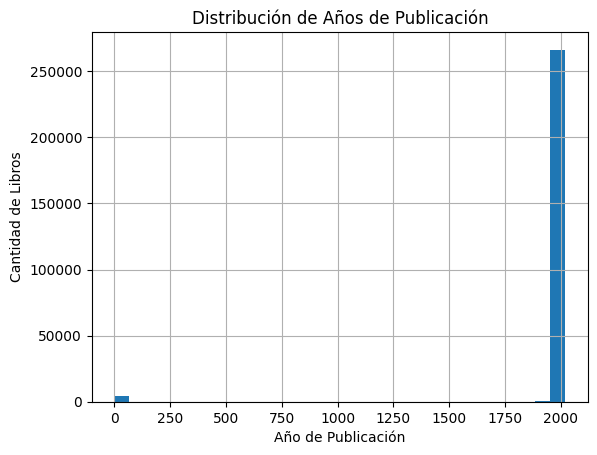

In [88]:
import matplotlib.pyplot as plt
# Histograma de años de publicación
books_df['Year-Of-Publication'].hist(bins=30)
plt.title('Distribución de Años de Publicación')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Libros')
plt.show()


Observamos que tenemos un conjunto importante de libros en el año 0, analizemos un poco mas este subconjunto de datos.

In [89]:
#Convertir 'Year-Of-Publication' a numérico, manejando errores
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Filtrar libros publicados antes del año 5
libros_pre_5 = books_df[books_df['Year-Of-Publication'] < 5]

# Mostrar los títulos de estos libros
titulos_pre_5 = libros_pre_5['Book-Title']
print(titulos_pre_5)
print("Numero de titulos antes del año 5:" ,len(titulos_pre_5))


176                                        Kabale Und Liebe
188                                 Die Liebe in Den Zelten
288                             Poisonwood Bible Edition Uk
351            Herr Der Fliegen (Fiction, Poetry and Drama)
542       Biblioteca Universale Rizzoli: Sulla Sponda De...
                                ...                        
270794                           Foe (Essential.penguin S.)
270913                                       Postmens House
271094                             El Misterio De Sittaford
271182                                            Tom Penny
271196                                       Der Hofmeister
Name: Book-Title, Length: 4618, dtype: object
Numero de titulos antes del año 5: 4618


In [90]:
#Comprobemos cuantos de estos datos son del año de publicacion = 0.
# Contar cuántos libros tienen el año de publicación igual a 0
books_year_0 = books_df[books_df['Year-Of-Publication'] == 0]
num_books_year_0 = books_year_0.shape[0]
print("Numero de titulos del año 0:" ,num_books_year_0)


Numero de titulos del año 0: 4618


Vemos que los 4618 titulos cerca del rango 0, estan exactamente en el rango 0 por lo que los consideraremos error, y los eliminaremos del dataset.

Antes de realizar cambios en el dataframe, vamos a realizar un backup.

In [91]:
# Crear una copia de seguridad del df original
books_df_backup = books_df.copy()

In [92]:
#Eliminasmos los registros con año de publicacion = 0
books_df = books_df[books_df['Year-Of-Publication'] != 0]

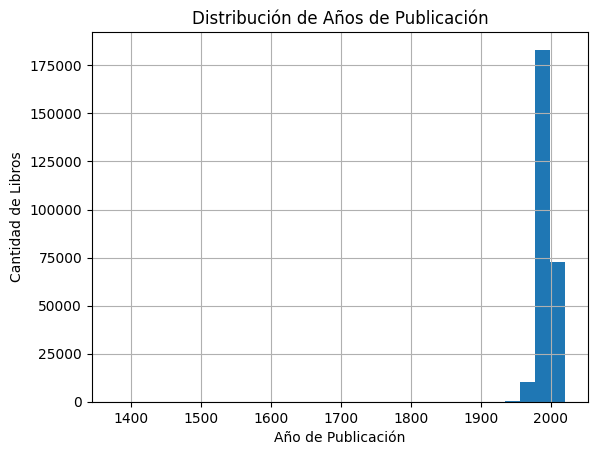

In [93]:
#Comprobamos que se haya eliminado
import matplotlib.pyplot as plt
#Histograma
books_df['Year-Of-Publication'].hist(bins=30)
plt.title('Distribución de Años de Publicación')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Libros')
plt.show()

Vemos que se han eliminado esos registros sobrantes, pero siguen apareciendo registros en el año 1400.
Comprobar libros entre 1400 y 1900

In [94]:
#Filtrar libros publicados entre 1400 y 1900
libros_1400_1900 = books_df[(books_df['Year-Of-Publication'] >= 1400) & (books_df['Year-Of-Publication'] <= 1900)]

# Contar cuántos libros hay en este rango
num_libros_1400_1900 = libros_1400_1900.shape[0]
print("Numero de libros entre 1400 y 1900: " , num_libros_1400_1900)


Numero de libros entre 1400 y 1900:  5


In [95]:
#Analizemos estos libros para ver si son datos erroneos o no

#Seleccionar las columnas de interés: año de publicación, título y autor
info_libros_1400_1900 = libros_1400_1900[['Year-Of-Publication', 'Book-Title', 'Book-Author']]

#Imprimimos la información
print(info_libros_1400_1900.to_string())


        Year-Of-Publication                                                               Book-Title          Book-Author
108555               1900.0  Is That a Gun in Your Pocket?: Women's Experience of Power in Hollywood    Rachel Abramowitz
171817               1806.0         Complete Works 10 Volumes [2,6,7,8,9] (Notable American Authors)    Benjamin Franklin
211854               1900.0         The Cycling Adventures of Coconut Head: A North American Odyssey          Ted Schredd
245607               1897.0         Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS American Literature)  Silas Weir Mitchell
256444               1900.0       Help Yourself: Celebrating the Rewards of Resilience and Gratitude      David J. Pelzer


In [96]:
#Eliminamos estos libros ya que contienen errores  y representan una fraccion muy pequeña del total
#otra opcion hubiera sido darles un valor predeterminado.
#Eliminar los registros de libros entre 1400 y 1900
#Filtrar libros publicados entre 1400 y 1900
#comprobar el número de filas antes de la eliminación
print(f"Número de filas antes de eliminar registros específicos: {books_df.shape[0]}")

#Filtrar libros publicados entre 1400 y 1900
libros_1400_1900 = books_df[(books_df['Year-Of-Publication'] >= 1400) & (books_df['Year-Of-Publication'] <= 1900)]

#Eliminar estos registros de books_df
books_df = books_df.drop(libros_1400_1900.index)

#Comprobar el número de filas después de la eliminación
print(f"Número de filas después de eliminar registros específicos: {books_df.shape[0]}")



Número de filas antes de eliminar registros específicos: 266726
Número de filas después de eliminar registros específicos: 266721


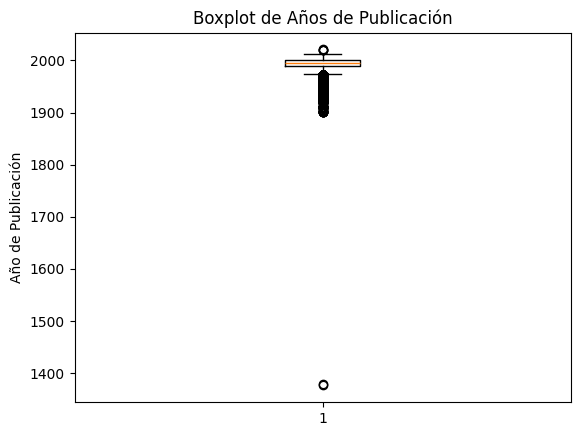

In [97]:
# Crear un boxplot de los años de publicación
plt.boxplot(books_df['Year-Of-Publication'].dropna())
plt.title('Boxplot de Años de Publicación')
plt.ylabel('Año de Publicación')
plt.show()


Por ultimo, vamos a eliminar las columnas con las imagenes, ya que no nos haran falta para el modelo de ML, que implementaremos, utilizaremos un metodo basado en contenido.

In [98]:
# Eliminar columnas de imágenes del DataFrame
columns_to_drop = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']
books_df = books_df.drop(columns=columns_to_drop)

# Verificar el DataFrame después de eliminar las columnas
print(books_df.head().to_string())


         ISBN                                                                                          Book-Title           Book-Author  Year-Of-Publication                   Publisher
0  0195153448                                                                                 Classical Mythology    Mark P. O. Morford               2002.0     Oxford University Press
1  0002005018                                                                                        Clara Callan  Richard Bruce Wright               2001.0       HarperFlamingo Canada
2  0060973129                                                                                Decision in Normandy          Carlo D'Este               1991.0             HarperPerennial
3  0374157065  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It      Gina Bari Kolata               1999.0        Farrar Straus Giroux
4  0393045218                                                              

In [99]:
books_df.to_csv(r'C:\Users\Brais\Desktop\Overstand\books_df.csv', index=False)


---------------------------------------------------------------------------------------------------------------------------------------------

Analisis inicial de archivo Users_csv

In [100]:
#Carga y visualizacion inicial

users_df = pd.read_csv('Users.csv')

#Mostramos las primeras 10 filas
print(users_df.head(10))

   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
5        6       santa monica, california, usa  61.0
6        7                 washington, dc, usa   NaN
7        8            timmins, ontario, canada   NaN
8        9          germantown, tennessee, usa   NaN
9       10          albacete, wisconsin, spain  26.0


In [101]:
#Mostrar las columnas
print("Columnas del DataFrame:")
for i, columna in enumerate(users_df.columns, 1): #Este numero 1, indica que el indice empieze en 1 y no en 0 por la funcion enumerate
    print(f"{i}. {columna}")

Columnas del DataFrame:
1. User-ID
2. Location
3. Age


In [102]:
#Vemos cuantas filas y columnas contiene el archivo
print(users_df.shape)
#Una manera un poco mas elaborada de dar la informacion.
num_filas, num_columns = users_df.shape
#ostrar el número de filas y columnas
print(f"El DataFrame tiene {num_filas} filas y {num_columns} columnas.")

(278858, 3)
El DataFrame tiene 278858 filas y 3 columnas.


Analisis exploratorio (EDA) Users.csv

In [103]:
#Información sobre los tipos de datos y valores nulos
print(users_df.info())
print(users_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None
User-ID          0
Location         0
Age         110762
dtype: int64


Vemos como la columna "Age" tiene un numero muy elevado de valores nulos "110762" que tenemos que manejar.

Antes de hacer cualquier cambio en el df original, hacemos una copia/backup

In [104]:
users_df_backup = users_df.copy()

Vamos a ver en mas detalle la columna "Age", como se distribuye mediante un grafico

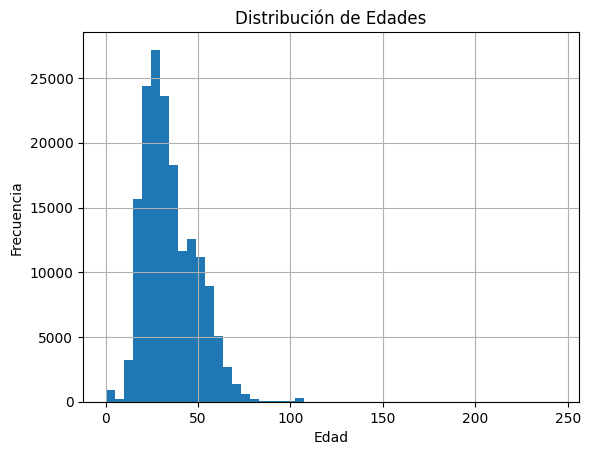

In [105]:
import matplotlib.pyplot as plt

#Histograma de la columna 'Age'
users_df['Age'].hist(bins=50)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Observamos que hay usuarios con mas de 100 años, veamos si es un error.

In [106]:
#Contar usuarios con edad mayor o igual a 100
usuarios_100_o_mas = users_df[users_df['Age'] >= 100]
cantidad_usuarios_100_o_mas = usuarios_100_o_mas.shape[0]
print(f"Número de usuarios con 100 años o más: {cantidad_usuarios_100_o_mas}")


Número de usuarios con 100 años o más: 373


Vamos a borrar estos registros de usuarios ya que pensamos que es un error.

In [107]:
#Eliminamos usuarios con edad mayor o igual a 100
users_df = users_df[users_df['Age'] < 100]

#Contamos usuarios con edad mayor o igual a 100
num_usuarios_mayores_100 = users_df[users_df['Age'] >= 100].shape[0]
# Mostrar el número de usuarios con 100 años o más
print(f"Número de usuarios con 100 años o más: {num_usuarios_mayores_100}")

Número de usuarios con 100 años o más: 0


Analizemos los valores bajos de la columna "Age"

In [108]:
#usuarios con edad menor a 16
num_usuarios_menores_16 = users_df[users_df['Age'] < 16].shape[0]

#número de usuarios menores de 16 años
print(f"Número de usuarios menores de 16 años: {num_usuarios_menores_16}")

#usuarios con edad menor a 10
num_usuarios_menores_10 = users_df[users_df['Age'] < 10].shape[0]
print(f"Número de usuarios con edad menor a 10 años: {num_usuarios_menores_10}")

#usuarios con edad menor a 5
num_usuarios_menores_5 = users_df[users_df['Age'] < 5].shape[0]
print(f"Número de usuarios con edad menor a 5 años: {num_usuarios_menores_5}")

#usuarios con edad igual a 0
num_usuarios_edad_0 = users_df[users_df['Age'] == 0].shape[0]

#Mostramos el número de usuarios con edad 0
print(f"Número de usuarios con edad igual a 0: {num_usuarios_edad_0}")



Número de usuarios menores de 16 años: 6696
Número de usuarios con edad menor a 10 años: 1069
Número de usuarios con edad menor a 5 años: 882
Número de usuarios con edad igual a 0: 416


Eliminamos a los usuarios menores de 16 años, suponiendo que en nuestra aplicacion  o web, se pueda registrarse a partir de esa edad.

In [109]:
users_df = users_df[users_df['Age'] >= 16]


Ahora comprobamos que no existen usuarios mayores a 100 ni menores de 16 años.

In [110]:
#Comprobar si hay usuarios con edad menor a 16
num_usuarios_menores_16 = users_df[users_df['Age'] < 16].shape[0]
print(f"Número de usuarios con edad menor a 16 años: {num_usuarios_menores_16}")

#Comprobar si hay usuarios con edad mayor a 100
num_usuarios_mayores_100 = users_df[users_df['Age'] > 100].shape[0]
print(f"Número de usuarios con edad mayor a 100 años: {num_usuarios_mayores_100}")



Número de usuarios con edad menor a 16 años: 0
Número de usuarios con edad mayor a 100 años: 0


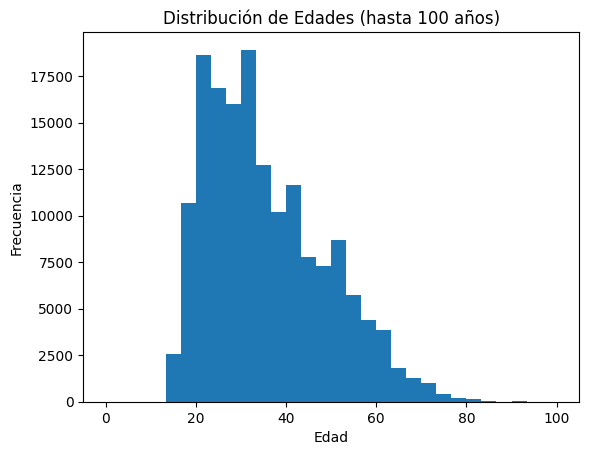

In [111]:
#Histograma de la columna 'Age' con límite de eje x hasta 100, se han eliminado los registos "Age" >= 100 y < 16.
plt.hist(users_df['Age'], bins=30, range=(0, 100))
plt.title('Distribución de Edades (hasta 100 años)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [112]:
#Calculamos la mediana y la media
median_age = users_df['Age'].median()
print(median_age)
mean_age = users_df['Age'].mean()
print(mean_age)


33.0
35.497755034869925


Para la gestion de los valores nulos de age, podemos eliminarlos o darles un valor, vamos a darles el valor de la mediana.

In [113]:
users_df['Age'].fillna(median_age, inplace=True)

In [114]:
#Contar y mostrar el número de valores nulos en la columna Age después de la sustitución
num_valores_nulos_age = users_df['Age'].isnull().sum()
print(f"Número de valores nulos en la columna 'Age' después de la sustitución: {num_valores_nulos_age}")


Número de valores nulos en la columna 'Age' después de la sustitución: 0


Por ultimo, comprobamos que la columna Id, no tenga valores repetidos, ya sabemos que no tiene nulos.
Podemos hacer un pequeño script por si nos hace falta en el futuro como el siguiente.

In [115]:
#Contar el número total de IDs únicos
num_ids_unicos = users_df['User-ID'].nunique()

#Comparar con el número total de filas en el DataFrame
num_total_filas = users_df.shape[0]

#Imprimir resultados
print(f"Número de IDs únicos: {num_ids_unicos}")
print(f"Número total de filas: {num_total_filas}")

#Verificar si son iguales
if num_ids_unicos == num_total_filas:
    print("No hay IDs repetidos.")
else:
    print("Hay IDs repetidos.")


Número de IDs únicos: 161027
Número total de filas: 161027
No hay IDs repetidos.


Analizemos la columna "Location"

In [116]:
users_df_backup.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [117]:
#Dividir la columna 'Location' en tres partes y manejar filas con formato diferente
location_parts = users_df['Location'].str.split(',', n=2, expand=True)

#Si hay más de tres partes, solo tomamos las primeras tres
location_parts = location_parts.iloc[:, :3]

#Asignar nombres a las nuevas columnas
location_parts.columns = ['Ciudad', 'Región', 'País']

#Llenar los valores faltantes con un valor por defecto o NaN
location_parts['Ciudad'].fillna('Desconocido', inplace=True)
location_parts['Región'].fillna('Desconocido', inplace=True)
location_parts['País'].fillna('Desconocido', inplace=True)

#Añadir estas nuevas columnas al DataFrame original
users_df[['Ciudad', 'Región', 'País']] = location_parts

#Ver las primeras filas del DataFrame actualizado
print(users_df.head(20).to_string())


    User-ID                                Location   Age          Ciudad               Región       País
1         2               stockton, california, usa  18.0        stockton           california        usa
3         4               porto, v.n.gaia, portugal  17.0           porto             v.n.gaia   portugal
5         6           santa monica, california, usa  61.0    santa monica           california        usa
9        10              albacete, wisconsin, spain  26.0        albacete            wisconsin      spain
12       13             barcelona, barcelona, spain  26.0       barcelona            barcelona      spain
17       18  rio de janeiro, rio de janeiro, brazil  25.0  rio de janeiro       rio de janeiro     brazil
19       20            langhorne, pennsylvania, usa  19.0       langhorne         pennsylvania        usa
20       21          ferrol / spain, alabama, spain  46.0  ferrol / spain              alabama      spain
23       24                   cologne, nrw, ge

Observamos que la columna region muchas veces esta mal, vamos a eliminarla del dataframe.

In [118]:
#Eliminamos 'Región' del DataFrame users_df
users_df.drop(columns=['Región'], inplace=True)

#Comprobamos los datos
print(users_df.head().to_string())


    User-ID                       Location   Age        Ciudad       País
1         2      stockton, california, usa  18.0      stockton        usa
3         4      porto, v.n.gaia, portugal  17.0         porto   portugal
5         6  santa monica, california, usa  61.0  santa monica        usa
9        10     albacete, wisconsin, spain  26.0      albacete      spain
12       13    barcelona, barcelona, spain  26.0     barcelona      spain


Veamos cuantos paises hay en nuestro data frame y cuantas veves se repiten

In [119]:
#Contar la frecuencia de cada país en la columna 'País'
frecuencia_paises = users_df['País'].value_counts()

#Mostrar la frecuencia de los países
print(frecuencia_paises)

#Mostrar el número total de países únicos
print(f"Número total de países únicos: {users_df['País'].nunique()}")


País
 usa                                 73257
 spain                               12188
 united kingdom                      11965
 canada                              10831
 germany                             10346
                                     ...  
 hubei province, hong kong               1
bagan datoh, perak, n/a, malaysia        1
 sao tome and principe"                  1
 molise, china                           1
 palau                                   1
Name: count, Length: 780, dtype: int64
Número total de países únicos: 780


Veamos una distribucion grafica de los 5 paises con mas usuarios

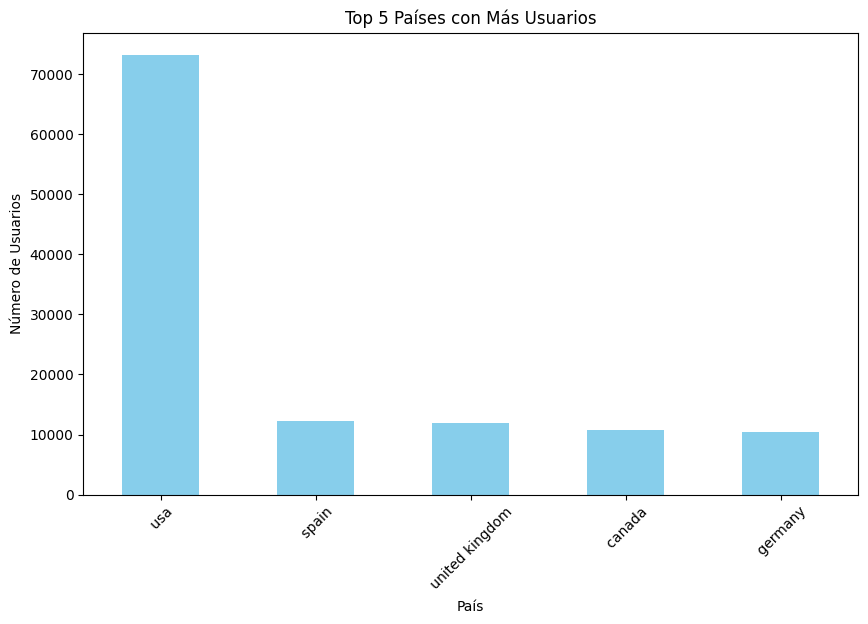

In [120]:
top_paises = frecuencia_paises.head(5)

#Creamos una gráfica de barras para ver mejor los datos
plt.figure(figsize=(10, 6))
top_paises.plot(kind='bar', color='skyblue')
plt.title('Top 5 Países con Más Usuarios')
plt.xlabel('País')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45) #Rotamos las etquiteas de los paises para que se vean mejor.
plt.show()


In [121]:
users_df.to_csv(r'C:\Users\Brais\Desktop\Overstand\users_df.csv', index=False)

-------------------------------------------------------------------------------------------------------------------------------------

Archivo Ratingss.csv

In [122]:
#Carga y visualizacion inicial
#Leer el archivo CSV
ratings_df = pd.read_csv('Ratings.csv')

#Mostrar las primeras 10 filas
print(ratings_df.head(10))


   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6
5   276733  2080674722            0
6   276736  3257224281            8
7   276737  0600570967            6
8   276744  038550120X            7
9   276745   342310538           10


In [123]:
#Mostrar las columnas
print("Columnas del DataFrame:")
for i, columna in enumerate(ratings_df.columns, 1): #Este numero 1, indica que el indice empieze en 1 y no en 0 por la funcion enumerate
    print(f"{i}. {columna}")

Columnas del DataFrame:
1. User-ID
2. ISBN
3. Book-Rating


In [124]:
#Vemos cuantas filas y columnas contiene el archivo
print(ratings_df.shape)
#Una manera un poco mas elaborada de dar la informacion.
num_filas, num_columns = ratings_df.shape
#Mostrar el número de filas y columnas
print(f"El DataFrame tiene {num_filas} filas y {num_columns} columnas.")

(1149780, 3)
El DataFrame tiene 1149780 filas y 3 columnas.


In [125]:
ratings_df.info()

ratings_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Analisis exploratorio (EDA) Ratings.csv

In [126]:
#Mostramos las primeras 5 filas
print(ratings_df.head(5))

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


Cada vez que se repita el User-ID, sera una valoracion a un libro, entonces vamos a ver los usuarios que mas libros han valorado.

In [127]:
top_users = ratings_df['User-ID'].value_counts().head(15)
print(top_users)

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
230522     2991
16795      2948
234623     2674
36836      2529
52584      2512
Name: count, dtype: int64


Vamos a eliminar al usuario con 13602 calificaciones, ya que pensamos que se trata de un error.

In [128]:
ratings_df = ratings_df[ratings_df['User-ID'] != 11676]
#Comprobamos que se haya eliminado correctamente
top_users = ratings_df['User-ID'].value_counts().head(15)
print(top_users)

User-ID
198711    7550
153662    6109
98391     5891
35859     5850
212898    4785
278418    4533
76352     3367
110973    3100
235105    3067
230522    2991
16795     2948
234623    2674
36836     2529
52584     2512
245963    2507
Name: count, dtype: int64


Calculamos la media de las calificaciones por usuario

In [129]:
#Calcular la media de calificaciones por usuario
mean_ratings_by_user = ratings_df.groupby('User-ID')['Book-Rating'].mean()

#Mostramos las medias de calificaciones
print(mean_ratings_by_user)


User-ID
2         0.000000
7         0.000000
8         2.166667
9         2.000000
10        3.000000
            ...   
278846    4.000000
278849    2.250000
278851    3.956522
278852    8.000000
278854    5.250000
Name: Book-Rating, Length: 105282, dtype: float64


In [130]:
#Mostramos el número de usuarios con una calificación media de 0
numero_usuarios_media_cero = (mean_ratings_by_user == 0).sum()

print(f"Número de usuarios con una calificación media de 0: {numero_usuarios_media_cero}")

#Contar el número de calificaciones por usuario
count_ratings_by_user = ratings_df.groupby('User-ID')['Book-Rating'].count()

#Combinar los dos cálculos y filtrar a los usuarios que tienen una media de 0 y más de una calificación
usuarios_con_media_cero_y_multiples_calificaciones = count_ratings_by_user[
    (mean_ratings_by_user == 0) & (count_ratings_by_user > 1)
].count()

print(f"Número de usuarios con más de una calificación y una calificación media de 0: {usuarios_con_media_cero_y_multiples_calificaciones}")


Número de usuarios con una calificación media de 0: 27478
Número de usuarios con más de una calificación y una calificación media de 0: 4929


In [131]:
#Usuarios a eliminar
usuarios_a_eliminar = count_ratings_by_user[
    (mean_ratings_by_user == 0) & (count_ratings_by_user > 1)
].index

#Los eliminamos
ratings_df_limpio = ratings_df[~ratings_df['User-ID'].isin(usuarios_a_eliminar)]
print(f"Número de usuarios con más de una calificación y una calificación media de 0: {usuarios_con_media_cero_y_multiples_calificaciones}")

Número de usuarios con más de una calificación y una calificación media de 0: 4929


In [132]:
#Recalcular la media de calificaciones por usuario con el DataFrame actualizado
mean_ratings_by_user_limpio = ratings_df_limpio.groupby('User-ID')['Book-Rating'].mean()

#Recalcular el número de calificaciones por usuario con el DataFrame actualizado
count_ratings_by_user_limpio = ratings_df_limpio.groupby('User-ID')['Book-Rating'].count()

#Combinar los dos cálculos y contar a los usuarios que tienen una media de 0 y más de una calificación con los datos actualizados
usuarios_con_media_cero_y_multiples_calificaciones_limpio = count_ratings_by_user_limpio[
    (mean_ratings_by_user_limpio == 0) & (count_ratings_by_user_limpio > 1)
].count()

print(f"Número de usuarios con más de una calificación y una calificación media de 0 después de la limpieza: {usuarios_con_media_cero_y_multiples_calificaciones_limpio}")


Número de usuarios con más de una calificación y una calificación media de 0 después de la limpieza: 0


In [133]:
#Calculamos la media y desviación estándar de las calificaciones medias por usuario
mean_ratings_by_user = ratings_df.groupby('User-ID')['Book-Rating'].mean()
mean_of_means = mean_ratings_by_user.mean()
std_of_means = mean_ratings_by_user.std()

print(mean_of_means, std_of_means)


4.394233228505474 3.4117771589396515


Podemos acceder a estas medias a traves de el User-ID

In [134]:
#Filtrar mean_ratings_by_user para eliminar usuarios sin calificaciones
mean_ratings_by_user_filtrado = mean_ratings_by_user.dropna()

In [135]:
#Ejemplo 1: Obtener la media de calificaciones del usuario con User-ID 11676
media_usuario_11676 = mean_ratings_by_user.get(11676)
print(f"Media de calificaciones del usuario 11676: {media_usuario_11676}")

#Ejemplo 2: Obtener la media de calificaciones del usuario con User-ID 198711
media_usuario_198711 = mean_ratings_by_user.get(198711)
print(f"Media de calificaciones del usuario 198711: {media_usuario_198711}")

#Ejemplo 3: Obtener la media de calificaciones del usuario con User-ID 153662
media_usuario_153662 = mean_ratings_by_user.get(153662)
print(f"Media de calificaciones del usuario 153662: {media_usuario_153662}")


Media de calificaciones del usuario 11676: None
Media de calificaciones del usuario 198711: 0.01629139072847682
Media de calificaciones del usuario 153662: 2.786871828449828


In [136]:
#Verificar si el usuario 11676 ha hecho alguna calificación
usuario_11676_en_ratings = 11676 in ratings_df['User-ID'].values

print(f"El usuario 11676 ha hecho calificaciones: {usuario_11676_en_ratings}")


El usuario 11676 ha hecho calificaciones: False


No tenemos usuarios con calificaciones medias sean mas de 2 desviaciones estandar por encima o debajo de la media, lo que indica una distribucion homologa.


Guardamos el dataframe

In [137]:
ratings_df.to_csv(r'C:\Users\Brais\Desktop\Overstand\ratings_df.csv', index=False)


heads de los 3 data frames para fusionarlos

In [138]:

print(books_df.head(5).to_string())
print(users_df.head(5).to_string())
print(ratings_df.head(5).to_string())

         ISBN                                                                                          Book-Title           Book-Author  Year-Of-Publication                   Publisher
0  0195153448                                                                                 Classical Mythology    Mark P. O. Morford               2002.0     Oxford University Press
1  0002005018                                                                                        Clara Callan  Richard Bruce Wright               2001.0       HarperFlamingo Canada
2  0060973129                                                                                Decision in Normandy          Carlo D'Este               1991.0             HarperPerennial
3  0374157065  Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It      Gina Bari Kolata               1999.0        Farrar Straus Giroux
4  0393045218                                                              

COMBINACION DE DATAFRAMES

In [139]:
combined_books_ratings_df = pd.merge(ratings_df, books_df, on='ISBN')

In [140]:
final_combined_df = pd.merge(combined_books_ratings_df, users_df, on='User-ID')

Guardamos el dataframe 

In [141]:
final_combined_df.to_csv(r'C:\Users\Brais\Desktop\Overstand\final_combined_df.csv', index=False)

Preparacion del modelo

In [142]:
#Cambiar el nombre del DataFrame
model_df = final_combined_df.copy()
ml_df = final_combined_df.copy()
ml_df.to_csv(r'C:\Users\Brais\Desktop\Overstand\ml_df.csv', index=False)

#Nos aseguramos de que no hay valores nulos en 'Year-Of-Publication'
print(model_df['Year-Of-Publication'].isnull().sum())

#Convertir 'Year-Of-Publication' a int
model_df['Year-Of-Publication'] = model_df['Year-Of-Publication'].astype(int)


0


Vemos como year_of_publication ya no es un float.

In [143]:
#Mostrar las primeras 10 filas de modelo_df
print(model_df.head(10).to_string())
model_df.to_csv(r'C:\Users\Brais\Desktop\Overstand\model_df.csv', index=False)

   User-ID        ISBN  Book-Rating                                                                        Book-Title                 Book-Author  Year-Of-Publication                      Publisher               Location   Age      Ciudad  País
0     2313  034545104X            5                                                              Flesh Tones: A Novel                  M. J. Rose                 2002               Ballantine Books  cincinnati, ohio, usa  23.0  cincinnati   usa
1     2313  0812533550            9                                     Ender's Game (Ender Wiggins Saga (Paperback))            Orson Scott Card                 1986                      Tor Books  cincinnati, ohio, usa  23.0  cincinnati   usa
2     2313  0679745580            8                                             In Cold Blood (Vintage International)               TRUMAN CAPOTE                 1994                        Vintage  cincinnati, ohio, usa  23.0  cincinnati   usa
3     2313  00601732

En el codigo de arriba, vemos que se nos muestra a User-ID, no es un error, 

En el codigo siguiente se ve que hay varias calificaciones con 0, en la fase de limpieza de datos, borramos a todos los usuarios cuyas calificaciones medias eran 0 habiendo hecho mas de 1 calificacion, por lo que consideramos estos datos como correctos

In [144]:
#Muestra aleatoria
#Mostrar una muestra aleatoria de 10 filas de modelo_df
print(model_df.sample(10).to_string())


        User-ID        ISBN  Book-Rating                                                                                             Book-Title        Book-Author  Year-Of-Publication                       Publisher                                   Location   Age            Ciudad             País
616763   242465  0440504813           10                                                                              The Cleaning Encyclopedia         Don Aslett                 1993           Bantam Dell Pub Group                   visalia, california, usa  36.0           visalia              usa
184838    43246  0064408892            0                                                                                       A Is for AARRGH!  William J. Brooke                 2000    Harpercollins Juvenile Books                   toronto, ontario, canada  36.0           toronto           canada
512708   248531  0446672211            0                                                     Where t

TRABAJAMOS EN EL MODELO ML.
Basado en el contenido.

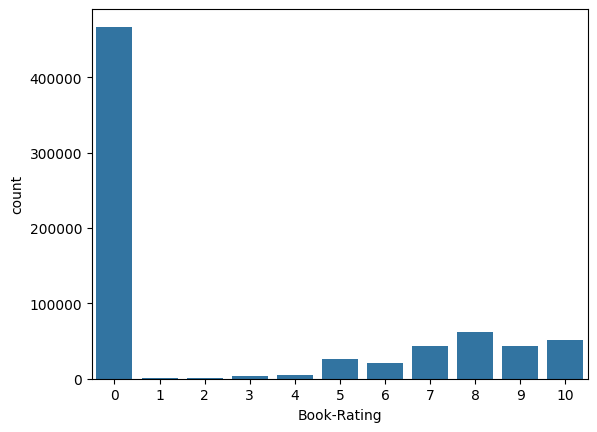

In [145]:
sns.countplot(x='Book-Rating', data=model_df)
plt.show()

Debido al sistema de clasificacion, los valores 0 son asigandos de manera implicita asi que los eliminamos.



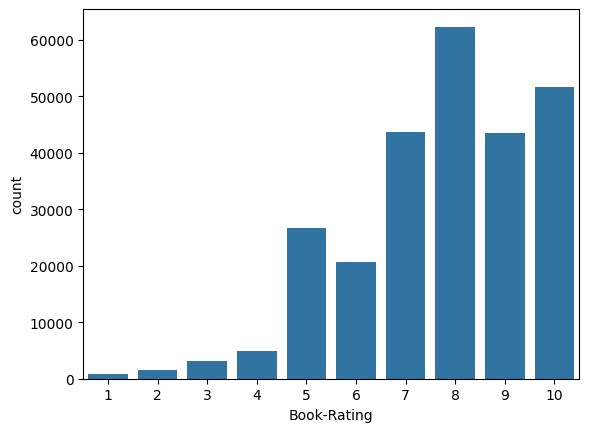

In [146]:
model_df = model_df[model_df['Book-Rating'] != 0]
#Comprobamos
sns.countplot(x='Book-Rating', data=model_df)
plt.show()

In [147]:
#Eliminamos  valores nulos
model_df = model_df.dropna()
model_df.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Location               0
Age                    0
Ciudad                 0
País                   0
dtype: int64

In [148]:
model_df.head(10)

#print(model_df.info())

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Ciudad,País
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0,cincinnati,usa
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0,cincinnati,usa
2,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0,cincinnati,usa
3,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0,cincinnati,usa
4,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23.0,cincinnati,usa
5,2313,0399146431,5,The Bonesetter's Daughter,Amy Tan,2001,Putnam Publishing Group,"cincinnati, ohio, usa",23.0,cincinnati,usa
6,2313,0345348036,9,The Princess Bride: S Morgenstern's Classic Ta...,WILLIAM GOLDMAN,1987,Del Rey,"cincinnati, ohio, usa",23.0,cincinnati,usa
7,2313,0553278223,7,The Martian Chronicles,RAY BRADBURY,1984,Spectra,"cincinnati, ohio, usa",23.0,cincinnati,usa
9,2313,0020442602,9,Voyage of the Dawn Treader,C. S. Lewis,1970,MacMillan Publishing Company.,"cincinnati, ohio, usa",23.0,cincinnati,usa
10,2313,0295955252,8,No-No Boy,John Okada,1978,University of Washington Press,"cincinnati, ohio, usa",23.0,cincinnati,usa


In [149]:
#La columna age es float, la pasamos a int
model_df['Age'] = model_df['Age'].astype('int64')


In [150]:
#Comprobamos cambios
model_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Ciudad,País
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23,cincinnati,usa
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23,cincinnati,usa
2,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23,cincinnati,usa
3,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23,cincinnati,usa
4,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,"cincinnati, ohio, usa",23,cincinnati,usa


Borramos la columna "Location" en el dataset

In [151]:
model_df = model_df.drop('Location', axis=1)
#Comprobamos cambios
model_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,Ciudad,País
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23,cincinnati,usa
1,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23,cincinnati,usa
2,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23,cincinnati,usa
3,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23,cincinnati,usa
4,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,23,cincinnati,usa


In [152]:
model_df.to_csv(r'C:\Users\Brais\Desktop\Overstand\df_limpio.csv', index=False)